## Regressão logística

### Bibliotecas e bases de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#Estilizar conteúdo
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def estilo_tabelas(df, max_altura='300px', casas_decimais=3):
    def cor_linhas(row):
        if row.name % 2 == 0:
            return ['background-color: #ffffff'] * len(row)
        else:
            return ['background-color: #f9f9f9'] * len(row)
    
    return (
        df.style.apply(cor_linhas, axis=1) 
        .set_table_styles(
            [
                {'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('border-bottom', '2px solid #007BFF')]},  # Azul abaixo do nome das colunas
                {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center'), ('max-height', '40px'), ('white-space', 'nowrap'), ('text-overflow', 'ellipsis'), ('overflow', 'hidden'), ('max-width', '300px')]},
                {'selector': 'table', 'props': [('width', '90%'), ('margin-left', 'auto'), ('margin-right', 'auto'), ('border-collapse', 'collapse')]},
                {'selector': 'td, th', 'props': [('border', '1px solid #666')]},
            ]
        )
        .set_properties(
            **{'border-color': 'darkgray', 'border-style': 'solid', 'border-width': '1px'}
        )
        .set_table_attributes(
            f'style="height:auto; overflow:auto; max-height:{max_altura}; display:block;"'  
        )
        .format(
            precision=casas_decimais  
        )
    )

In [5]:
df_eventos_2010_2017_modelo1 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2010_2017_modelo1.csv",
    sep=';',
    decimal=',',
)

df_eventos_preprocessado.head(5)

HTTPError: HTTP Error 404: Not Found

### Regressão logística

#### Todas as variáveis - sem crossvalidation

In [15]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_semcross = LogisticRegression(solver='lbfgs')

X_train_completa_semcross, X_test_completa_semcross, y_train_completa_semcross, y_test_completa_semcross = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

reglog_completa_semcross.fit(X_train_completa_semcross,y_train_completa_semcross)

score_semcross = reglog_completa_semcross.score(X_test_completa_semcross, y_test_completa_semcross)

reglog_completa_semcross.score(X_test_completa_semcross,y_test_completa_semcross)

0.8912806539509537

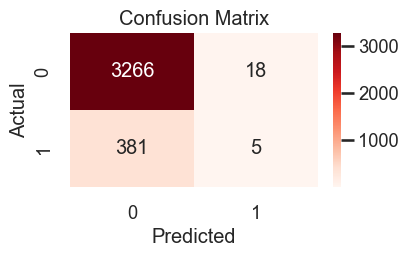

In [9]:
# Previsões no conjunto de teste
y_pred_completa_semcross = reglog_completa_semcross.predict(X_test_completa_semcross)

# Matriz de confusão
cm_completa_semcross = confusion_matrix(y_test_completa_semcross, y_pred_completa_semcross)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_completa_semcross, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Todas as variáveis - com crossvalidation (3 k-folds)

In [16]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_cross_3 = LogisticRegression(solver='lbfgs')

X_train_completa_cross_3, X_test_completa_cross_3, y_train_completa_cross_3, y_test_completa_cross_3 = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

cv_result_3 = cross_val_score(reglog_completa_cross_3, X_train_completa_cross_3, y_train_completa_cross_3, cv=3, scoring='f1_weighted')

reglog_completa_cross_3.fit(X_train_completa_cross_3, y_train_completa_cross_3)

mean_cv_result_3 = cv_result_3.mean()

print("Validação Cruzada com 3 k-folds - F1 Score (média):", cv_result_3.mean())

Validação Cruzada com 3 k-folds - F1 Score (média): 0.8506864516392784


#### Todas as variáveis - com crossvalidation (5 k-folds)

In [17]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_cross_5 = LogisticRegression(solver='lbfgs')

X_train_completa_cross_5, X_test_completa_cross_5, y_train_completa_cross_5, y_test_completa_cross_5 = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

cv_result_5 = cross_val_score(reglog_completa_cross_5, X_train_completa_cross_5, y_train_completa_cross_5, cv=5, scoring='f1_weighted')

reglog_completa_cross_5.fit(X_train_completa_cross_5, y_train_completa_cross_5)

mean_cv_result_5 = cv_result_5.mean()

print("Validação Cruzada com 5 k-folds - F1 Score (média):", cv_result_5.mean())

Validação Cruzada com 5 k-folds - F1 Score (média): 0.8512608516155724


#### Todas as variáveis - comparação sem cross validation x com cross validation

In [22]:
resultados_todas_variaveis = pd.DataFrame({
    'Método': ['Sem Cross-Validation', 'Cross-Validation (3 folds)', 'Cross-Validation (5 folds)'],
    'Medida de desempenho': ['Acurácia', 'F1 Score médio', 'F1 Score médio'],
    'Resultado': [score_semcross, mean_cv_result_3, mean_cv_result_5]
})

with pd.option_context('display.float_format', '{:.6f}'.format):
    display(resultados_todas_variaveis)

,Método,Medida de desempenho,Resultado
0,Sem Cross-Validation,Acurácia,0.891281
1,Cross-Validation (3 folds),F1 Score médio,0.850686
2,Cross-Validation (5 folds),F1 Score médio,0.851261
